<a href="https://colab.research.google.com/github/deepakbharti21/Loan-Application-Status-Prediction/blob/main/Loan_Application_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
loan_data = pd.read_csv("/content/drive/MyDrive/personal Capstone/LoanApplication_Prediction/loan_dataset.csv")           #data file from dive


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [ ]:
loan_data.shape


(614, 13)

In [ ]:
test_data.shape


(123, 12)

In [ ]:
loan_data['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
loan_data['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

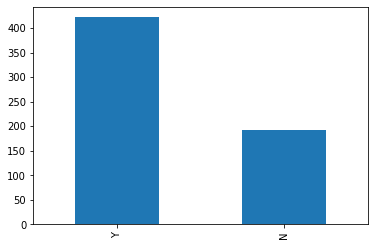

In [ ]:
loan_data['Loan_Status'].value_counts().plot.bar()


## Independent Variable (Categorical)


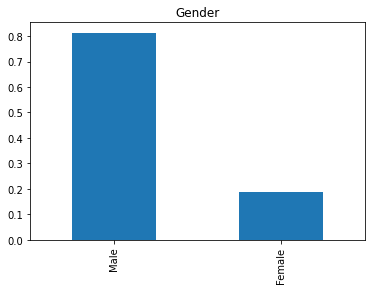

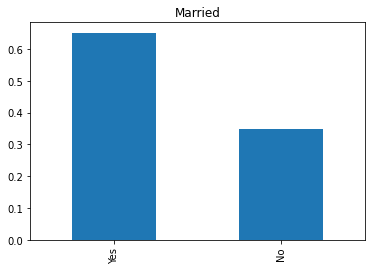

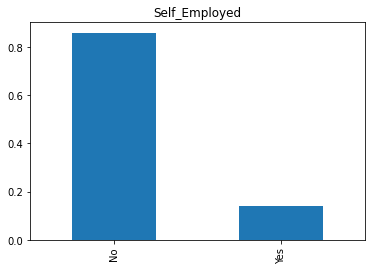

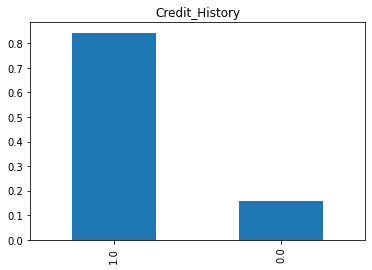

In [ ]:
loan_data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
loan_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
loan_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
loan_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

## Independent Variable (Ordinal)

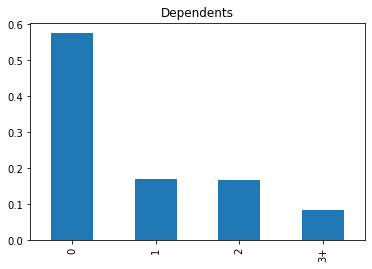

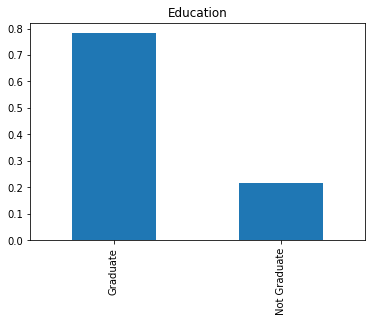

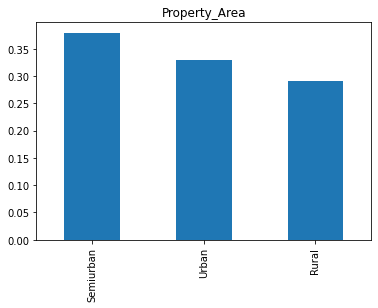

In [ ]:
loan_data['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
loan_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
loan_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Following inferences can be made from the above bar plots:


*   Most of the applicants don't have any dependents.

*   Around 80% of the applicants are Graduate.

*   Most of the applicants are from Semiurban area.





## Independent Variable (Numerical)

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


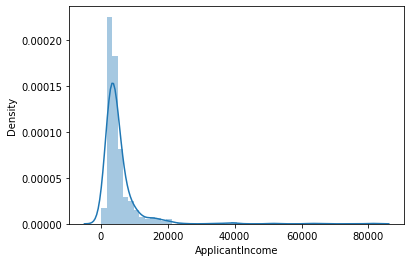

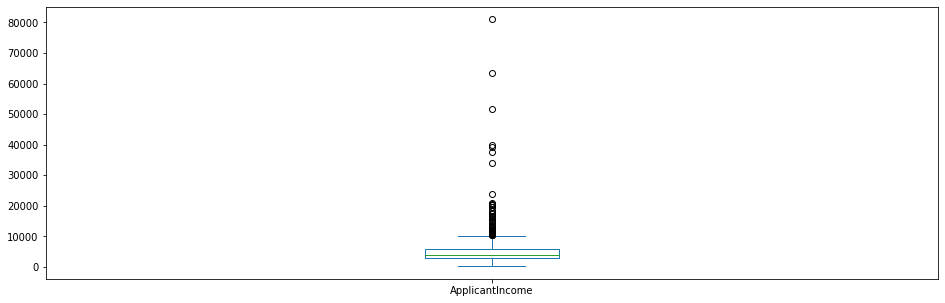

In [ ]:
sns.distplot(loan_data['ApplicantIncome'])
plt.show()
loan_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()
     

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

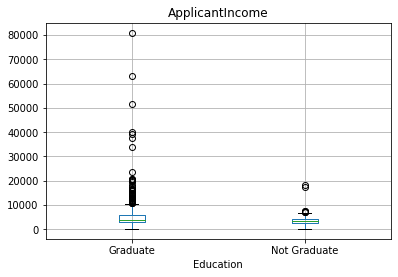

In [ ]:
loan_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


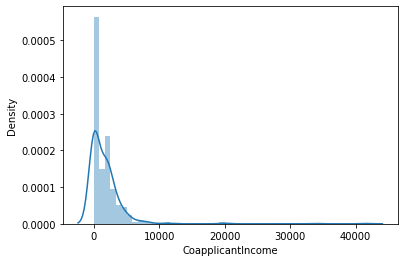

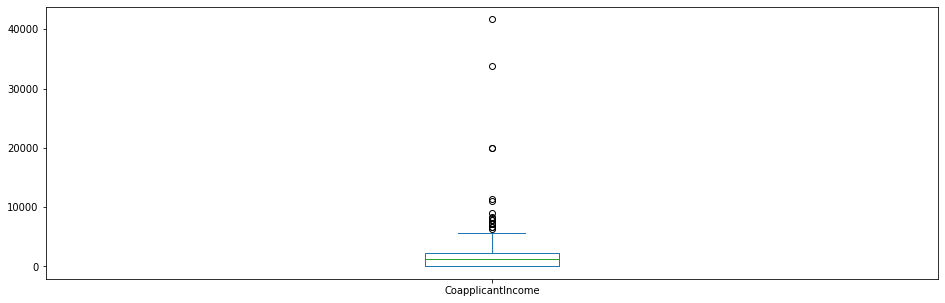

In [ ]:
sns.distplot(loan_data['CoapplicantIncome'])
plt.show()
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


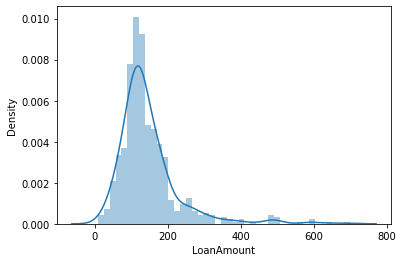

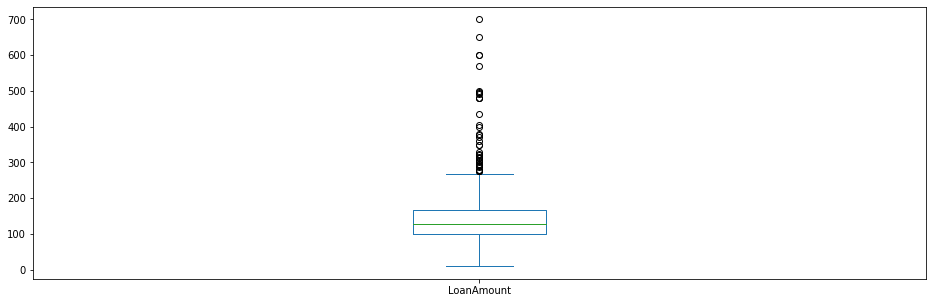

In [ ]:
loan_data.notna()
sns.distplot(loan_data['LoanAmount'])
plt.show()
loan_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# Bivariate Analysis

Let's recall some of the hypotheses that we generated earlier:

 **Applicants with high incomes should have more chances of loan approval.
Applicants who have repaid their previous debts should have higher chances of loan approval.**
**Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.**
**Let's try to test the above-mentioned hypotheses using bivariate analysis**

**After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.**

**Categorical Independent Variable vs Target Variable
First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.**

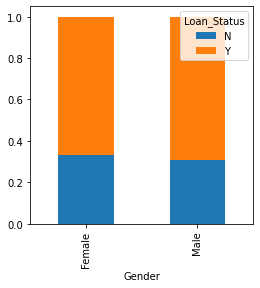

In [ ]:
Gender=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


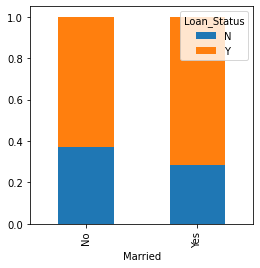

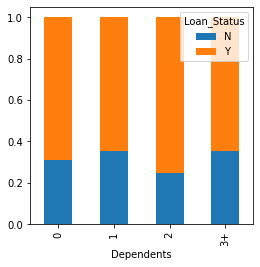

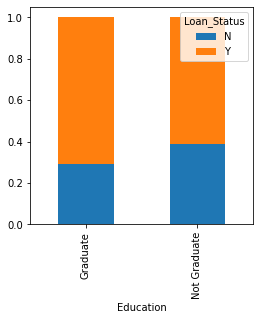

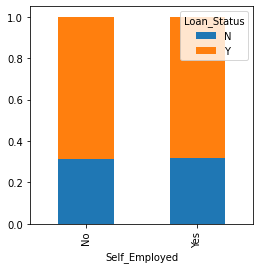

In [ ]:
Married=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status'])
Education=pd.crosstab(loan_data['Education'],loan_data['Loan_Status'])
Self_Employed=pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

The proportion of married appliants is higher for approved loans.

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.: 

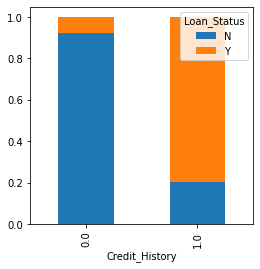

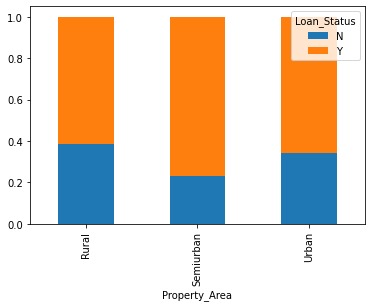

In [ ]:
Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Property_Area=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

## Numerical Independent Variable vs Target Variable


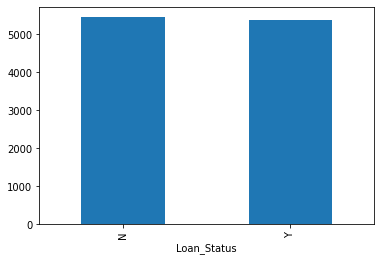

In [ ]:
loan_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


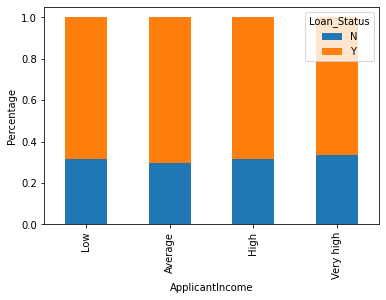

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Income_bin']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

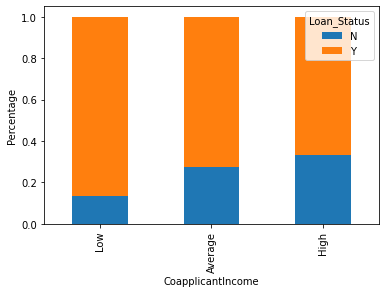

In [ ]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_data['Coapplicant_Income_bin']=pd.cut(loan_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_data['Coapplicant_Income_bin'],loan_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

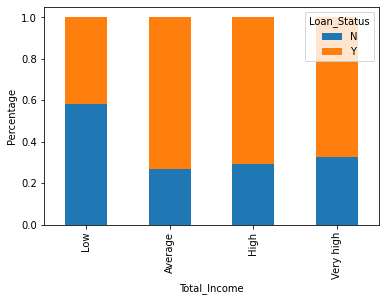

In [ ]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Total_Income_bin']=pd.cut(loan_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_data['Total_Income_bin'],loan_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

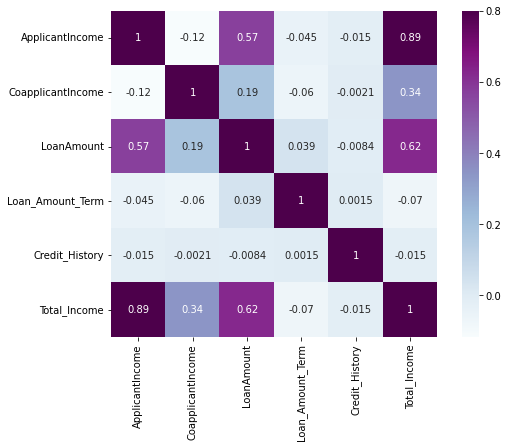

In [ ]:
matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

## Missing value imputation

In [ ]:
loan_data.isnull().sum()


Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
dtype: int64

In [ ]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

In [ ]:
loan_data['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)


In [ ]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)


In [ ]:
loan_data.isnull().sum()


Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
dtype: int64

In [ ]:
test_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)


## Outlier Treatement

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.


Let's examine what can happen to a data set with outliers.

For the sample data set:

1,1,2,2,2,2,3,3,3,4,4

We find the following: mean, median, mode, and standard deviation

Mean = 2.58
Median = 2.5
Mode=2
Standard Deviation = 1.08
If we add an outlier to the data set:

1,1,2,2,2,2,3,3,3,4,4,400

The new values of our statistics are:

Mean = 35.38
Median = 2.5
Mode=2
Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution.

We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer.

This is called right skewness. One way to remove the skewness is by doing the log transformation.

As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.



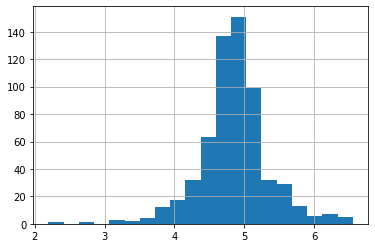

In [ ]:
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

## Model Building :


In [ ]:
loan_data=loan_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)


In [ ]:
X = loan_data.drop('Loan_Status',axis=1)
y = loan_data.Loan_Status


In [ ]:
train = loan_data.copy()
test = test_data.copy()


In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
model = LogisticRegression()
model.fit(x_train, y_train)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12',random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression()